# Time Series: Forecasting Bitcoin price

In [1]:
# Importing TF and checking the version
import tensorflow as tf

print(tf.__version__)

2.10.1


### Importing time series with Pandas

In [2]:
# Reading Bitcoin data and parsing dates
import pandas as pd

df = pd.read_csv(
    "BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
    parse_dates=["Date"],
    index_col=["Date"]   
)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
# Separating closing prices for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


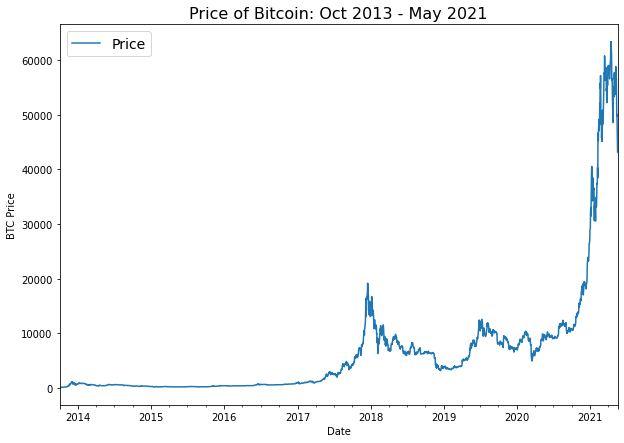

In [7]:
# Visualising Bitcoin prices
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
plt.legend(fontsize=14);

### Importing time series with Python

In [8]:
# Importing Bitcoin data with Python
import csv
from datetime import datetime

timestamps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader) # Skips first line to remove column names
    for line in csv_reader:
        timestamps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        btc_price.append(float(line[2]))

# Viewing first 10 records
timestamps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin: Oct 2013 - May 2021')

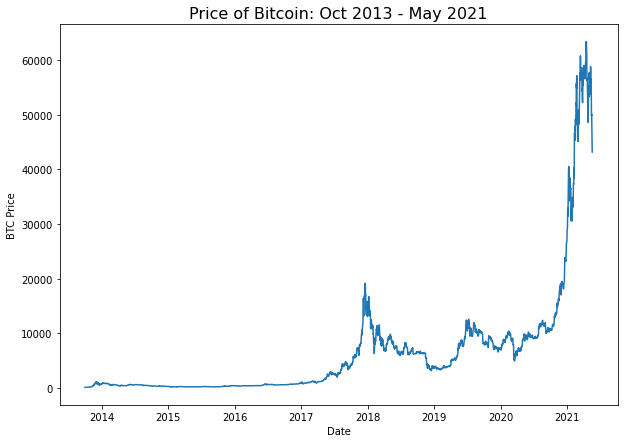

In [9]:
# Plotting from CSV
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timestamps, btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
#plt.legend();

### Creating train and test data

In [10]:
# Get Bitcoin date array
timestamps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timestamps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to create train / test split for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    timestamps, # dates
    prices, # BTC prices
    test_size=0.2,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

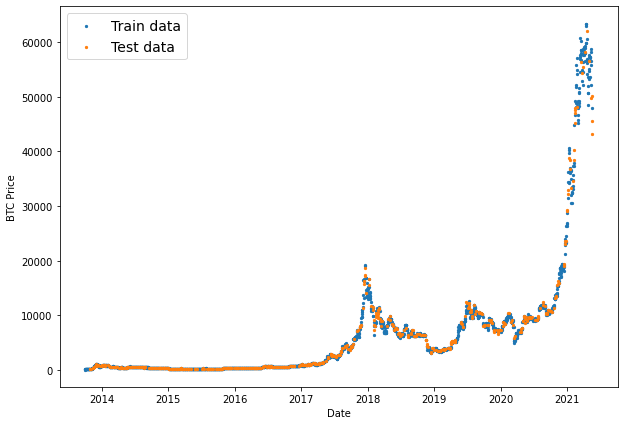

In [12]:
# Plotting the wrong data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [13]:
# Right way to create train / test split for time series data
split_size = int(0.8 * len(prices)) # 80% - train, 20% - test

X_train, y_train = timestamps[:split_size], prices[:split_size]
X_test, y_test = timestamps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

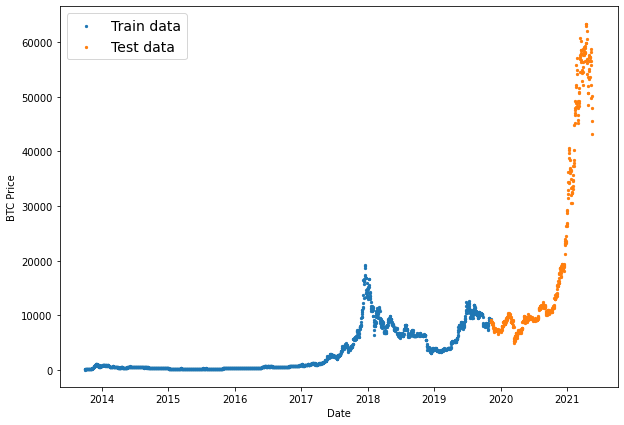

In [14]:
# Plotting the right data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [15]:
# Creating plotting function
def plot_time_series(timestamps, values, marker=",", start=0, end=None, label=None):
    plt.plot(timestamps[start:end], values[start:end], marker=marker, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

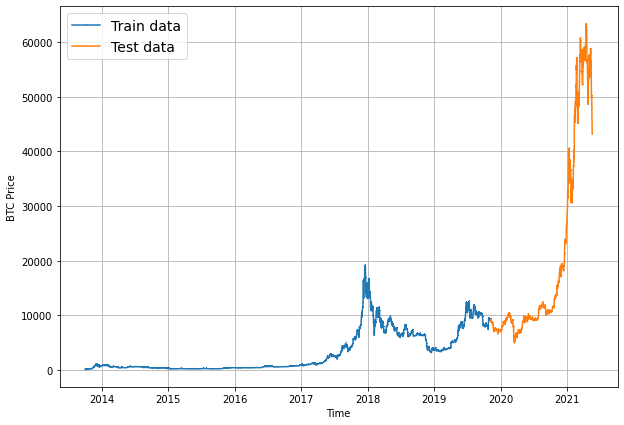

In [16]:
# Testing plot function
plt.figure(figsize=(10, 7))
plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, label="Test data")

### Model 0 - Naive forecast (baseline)

The prediction at timestamp t(y-hat) is equal to the value at timestamp t-1 (previous timestamp), i.e horizon of 1.
$$\hat{y}_{t} = y_{t-1}$$

In [17]:
# Creating naive forecast
naive_forecast = y_test[:-1]

print(f"First 10 values: {naive_forecast[:10]}\n")
print(f"Last 10 values: {naive_forecast[-10:]}")

First 10 values: [9226.48582088 8794.35864452 8798.04205463 9081.18687849 8711.53433917
 8760.89271814 8749.52059102 8656.97092235 8500.64355816 8469.2608989 ]

Last 10 values: [57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361]


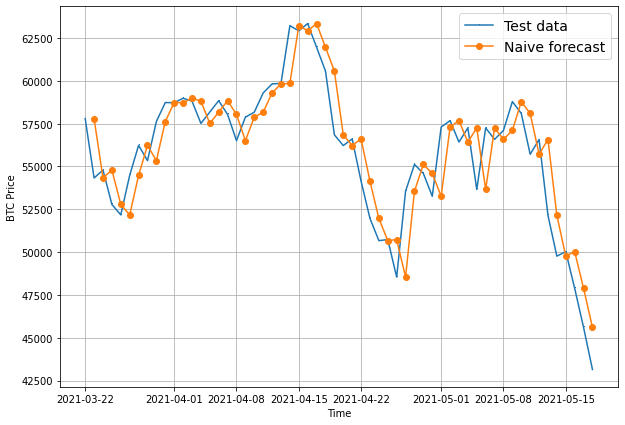

In [18]:
# Plotting naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, start=500, label="Test data")
plot_time_series(timestamps=X_test[1:], values=naive_forecast, start=500, marker="o", label="Naive forecast")

In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of Naive Forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Seasonality of 1 day

    return mae / mae_naive_no_season

In [20]:
# Verify if MASE of Naive Forecast is 1
mean_absolute_scaled_error(
    y_true=y_test[1:],
    y_pred=naive_forecast
)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182626>

In [21]:
# Function for evaluation matrix
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [22]:
# Evaluating naive forecast results
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

### Windowing data

In [23]:
# We want to use Bitcoin prices of the week to predict next day price
print(f"Intention is to use {btc_price[:7]} to predict {btc_price[7]}")

Intention is to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [24]:
# Setting up global variables for window size and horizon
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data

In [25]:
# Creating function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [26]:
# Testing window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8) + 1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [27]:
# Creating function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):

    # 1. Creating window of specific window size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    # 2. Creating 2D array of multiple windows
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    # print(f"Windows indexes: {window_indexes} with shape of {window_indexes.shape}")

    # 3. Index on the target array (time series) with 2D of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    return windows, labels

In [28]:
# Testing the function
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
# Viewing the first 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [30]:
# Viewing the last 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


### Splitting windows into training and testing sets

In [31]:
# Creating function to make train / test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1 - test_split)) # Default 80% train / 20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [32]:
# Creating training and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    full_windows, full_labels
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [33]:
# Checking the first 5 train window values
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [34]:
# Checking the first test values
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

### Modelling checkpoint callback

In [35]:
# Function to implement ModelCheckpoint callback
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True
    )

### Model 1 - Dense model (window = 7, horizon = 1)

In [36]:
# Loading libraries
import tensorflow as tf
from tensorflow.keras import layers

# Setting random seed
tf.random.set_seed(42)

# Constructing a model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# Compiling the model
model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

# Fitting the model
history_1 = model_1.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_1.name)]
)

Epoch 1/100
18/18 [==============================] - 3s 104ms/step - loss: 898.4213 - mae: 898.4213 - mse: 3063846.0000 - val_loss: 2441.0918 - val_mae: 2441.0918 - val_mse: 14320154.0000
Epoch 2/100
18/18 [==============================] - 1s 82ms/step - loss: 257.7967 - mae: 257.7967 - mse: 303145.4688 - val_loss: 1188.8167 - val_mae: 1188.8167 - val_mse: 4629580.5000
Epoch 3/100
18/18 [==============================] - 1s 67ms/step - loss: 195.1429 - mae: 195.1429 - mse: 189380.9531 - val_loss: 1002.5053 - val_mae: 1002.5053 - val_mse: 3364935.7500
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 179.2578 - mae: 179.2578 - mse: 170182.2812 - val_loss: 1012.5974 - val_mae: 1012.5974 - val_mse: 3211953.2500
Epoch 5/100
18/18 [==============================] - 1s 55ms/step - loss: 175.4444 - mae: 175.4444 - mse: 163824.0938 - val_loss: 939.3910 - val_mae: 939.3910 - val_mse: 2951404.2500
Epoch 6/100
18/18 [==============================] - 1s 64ms/step - loss: 1

In [37]:
# Evaluating the model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 587.2048 - mae: 587.2048 - mse: 1193632.7500


[587.204833984375, 587.204833984375, 1193632.75]

In [38]:
# Loading the best performing model_1 run and evaluating on test data
model_1_best = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 566.3576 - mae: 566.3576 - mse: 1161144.1250


[566.3576049804688, 566.3576049804688, 1161144.125]

In [39]:
# Creating function to make predictions
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # 1D array of predictions

In [40]:
# Making predictions with the model 1
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8771.762, 8700.73 , 8961.738, 8724.883, 8682.556, 8645.385,
        8620.284, 8460.356, 8371.479, 8461.839], dtype=float32)>)

In [41]:
# Evaluting model 1 predictions
model_1_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_1_preds
)
model_1_results

{'mae': 587.2049,
 'mse': 1193632.9,
 'rmse': 1092.535,
 'mape': 2.6576076,
 'mase': 1.0315564}

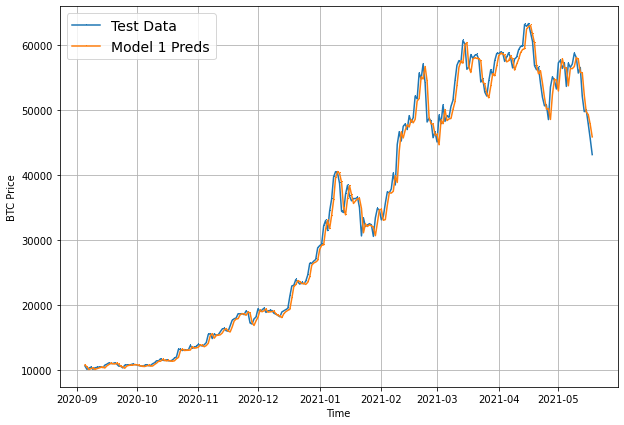

In [42]:
# Plotting model results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, ],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_1_preds,
    start=offset,
    label="Model 1 Preds"
)

### Model 2 - Dense model (window = 30, horizon = 1)

In [43]:
# Hyperparameters
HORIZON = 1
WINDOW_SIZE = 30

In [44]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2757, 2757)

In [45]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [46]:
# Checking first 3 train windows
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [47]:
# Creating a model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compiling the model
model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_2.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [48]:
# Evaluating model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 636.1233 - mae: 636.1233


[636.123291015625, 636.123291015625]

In [49]:
# Loading the best model 2
model_2_best = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 636.1233 - mae: 636.1233


[636.123291015625, 636.123291015625]

In [50]:
# getting model 2 predictions
model_2_preds = make_preds(
    model_2,
    input_data=test_windows
)

18/18 [==============================] - 0s 3ms/step


In [51]:
# Evaluating results
model_2_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_2_preds
)
model_2_results

{'mae': 636.12335,
 'mse': 1371397.6,
 'rmse': 1171.0669,
 'mape': 2.9118483,
 'mase': 1.1119499}

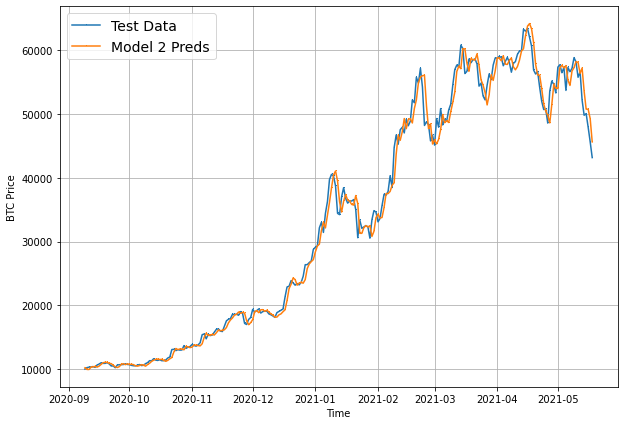

In [52]:
# Visualising model 2 results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_2_preds,
    start=offset,
    label="Model 2 Preds"
)

### Model 3 - Dense model (window = 30, horizon = 7)

In [53]:
# Hyperparameters
HORIZON = 7
WINDOW_SIZE = 30

In [54]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2751, 2751)

In [55]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [56]:
# Creating a model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

# Compiling the model
model_3.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_3 = model_3.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_3.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [57]:
# Evaluating model 3
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1401.2290 - mae: 1401.2290


[1401.22900390625, 1401.22900390625]

In [58]:
# Making predictions with model 3
model_3_preds = make_preds(
    model_3,
    input_data=test_windows
)
model_3_preds[:3]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9104.573 , 9157.285 , 9427.672 , 9276.531 , 9049.106 , 9072.315 ,
        9117.181 ],
       [8829.246 , 8926.14  , 8974.482 , 9024.026 , 8673.097 , 8661.292 ,
        8936.278 ],
       [8673.128 , 8865.803 , 8855.45  , 8842.857 , 8626.528 , 8688.38  ,
        8784.1455]], dtype=float32)>

In [59]:
# Evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': array([ 378.87988,  175.53041,  183.32645,  223.48006,  299.15598,
         339.93295,  332.41293,  288.27448,  317.43436,  372.7295 ,
         487.40582,  508.51904,  682.8633 ,  650.84515,  423.5286 ,
         330.87946,  311.88037,  486.1697 ,  469.77924,  528.8547 ,
         235.83705,  196.69832,  209.3757 ,  205.02908,  216.7576 ,
         211.26576,  264.11963,  315.40436,  270.00006,  189.72678,
         178.35582,  170.96408,  104.41804,  156.6499 ,  235.44203,
         291.93918,  278.07053,  308.03857,  247.46492,  401.16608,
         722.8034 ,  309.90555,  331.91617,  221.00893,  142.21352,
         267.49625,  246.61726,  209.94922,  192.27531,  236.17537,
         232.6033 ,  224.82771,  175.56166,  317.164  ,  319.46332,
         535.0646 ,  755.7353 ,  741.66077,  785.4215 ,  734.77844,
         568.3678 ,  408.93903,  382.82242,  602.98535,  611.58386,
         747.5147 ,  672.5023 ,  751.39215,  294.20856,  169.62318,
         221.44656,  251.28752,  278.4898

In [60]:
# Function for evaluation matrix
# MAKING IT WORK FOR HIGHER HORIZON
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different size metrics
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [61]:
# Re-evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': 1401.2289,
 'mse': 6157680.0,
 'rmse': 1600.738,
 'mape': 6.287882,
 'mase': 2.4934082}

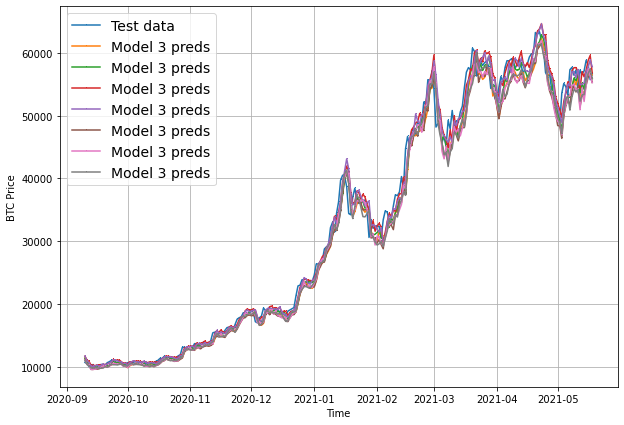

In [62]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_3_preds,
    start=offset,
    label="Model 3 preds"
)

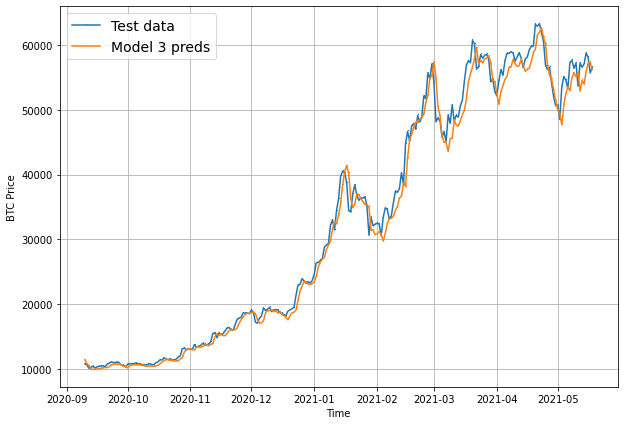

In [63]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=tf.reduce_mean(model_3_preds, axis=1),
    start=offset,
    label="Model 3 preds"
)

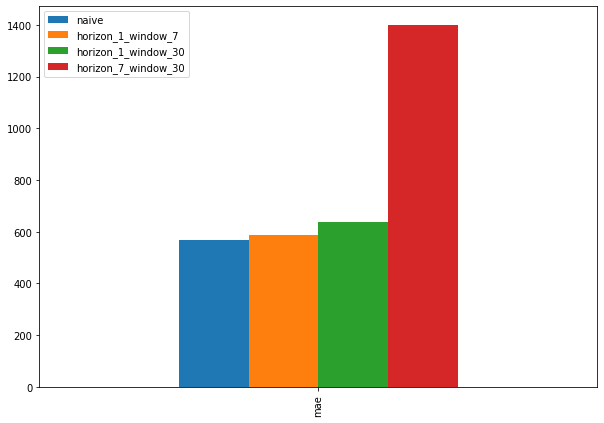

In [64]:
# Comparing models performance
pd.DataFrame({
    "naive": naive_results["mae"],
    "horizon_1_window_7": model_1_results["mae"],
    "horizon_1_window_30": model_2_results["mae"],
    "horizon_7_window_30": model_3_results["mae"]
}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4 - Using Conv1D

In [65]:
# Defining horizon and window
HORIZON = 1
WINDOW_SIZE = 7

In [66]:
# Creating windowed data
full_windows,full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [67]:
# Creating train / test datasets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [68]:
# Checking data input shape
train_windows[0].shape # returns WINDOW_SIZE

(7,)

In [69]:
# Conv1D expects input of (batch_size, timestamps, input_dim)

In [70]:
# Reshaping the tensor
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [71]:
# Creating Lambda layer
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [72]:
# Testing Lambda layer
print(f"Original shape: {x.shape}") # Output WINDOW_SIZE
print(f"Expanded shape: {expand_dim_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dim_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [73]:
# Creating Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_Conv1D")

# Compiling the model
model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_4 = model_4.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=100,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_4.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 10s - loss: 3724.9697

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 79ms/step - loss: 1774.9058 - val_loss: 1040.3448
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 339.5553 - val_loss: 1602.8940
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 224.3300 - val_loss: 1046.6765
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 190.2996

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 51ms/step - loss: 190.7036 - val_loss: 1030.4313
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 198.9867

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 56ms/step - loss: 184.4047 - val_loss: 1023.8250
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 181.5290

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 59ms/step - loss: 181.5290 - val_loss: 1022.6371
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 231.4041

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 53ms/step - loss: 180.4599 - val_loss: 990.7736
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 175.6519 - val_loss: 995.9991
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 173.1961 - val_loss: 1002.4204
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 169.7079

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 56ms/step - loss: 170.8927 - val_loss: 952.9757
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 189.8342

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 66ms/step - loss: 167.9645 - val_loss: 933.1417
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 166.5212 - val_loss: 973.1793
Epoch 13/100
18/18 [==============================] - 0s 7ms/step - loss: 163.4055 - val_loss: 939.8363
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 157.5851

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 60ms/step - loss: 160.4025 - val_loss: 904.1772
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 158.7034 - val_loss: 942.5839
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 150.2330

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 81ms/step - loss: 155.3770 - val_loss: 860.9961
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 152.2796 - val_loss: 899.4520
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 151.6743

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 56ms/step - loss: 150.4386 - val_loss: 851.0636
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 83.1140

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 52ms/step - loss: 146.4224 - val_loss: 850.4550
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 155.7816

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 63ms/step - loss: 146.1208 - val_loss: 809.6960
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 202.1432

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 67ms/step - loss: 143.8963 - val_loss: 781.6119
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 142.2482 - val_loss: 781.6178
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 138.0482 - val_loss: 795.1863
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 155.2147

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 59ms/step - loss: 138.7018 - val_loss: 770.8298
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 145.2341

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 67ms/step - loss: 136.6812 - val_loss: 749.0417
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 132.2738

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 57ms/step - loss: 132.2738 - val_loss: 729.1167
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 132.1506 - val_loss: 741.6991
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 130.6947

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 58ms/step - loss: 130.2815 - val_loss: 707.6639
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 123.9233

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 72ms/step - loss: 127.9413 - val_loss: 698.2043
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 129.8302 - val_loss: 764.0635
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 137.0294 - val_loss: 802.3538
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 133.3964

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 58ms/step - loss: 132.6473 - val_loss: 692.9296
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 152.4009

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 59ms/step - loss: 126.4943 - val_loss: 680.4900
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 133.6098

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 52ms/step - loss: 122.6809 - val_loss: 665.4240
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 109.8800

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 61ms/step - loss: 121.8060 - val_loss: 663.1722
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 125.3447 - val_loss: 738.6930
Epoch 37/100
15/18 [========================>.....] - ETA: 0s - loss: 125.0495

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 122.7556 - val_loss: 647.3666
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 119.9048

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 69ms/step - loss: 119.9048 - val_loss: 643.6805
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 119.1337

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 64ms/step - loss: 119.1337 - val_loss: 638.1037
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 118.3760 - val_loss: 640.7490
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 107.9745

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 60ms/step - loss: 120.2275 - val_loss: 635.2375
Epoch 42/100
18/18 [==============================] - ETA: 0s - loss: 121.8416

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 74ms/step - loss: 121.8416 - val_loss: 627.0167
Epoch 43/100
18/18 [==============================] - 0s 10ms/step - loss: 116.7422 - val_loss: 638.4672
Epoch 44/100
13/18 [====================>.........] - ETA: 0s - loss: 114.2538

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 73ms/step - loss: 117.4024 - val_loss: 622.3439
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0813 - val_loss: 628.2603
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 90.5536

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 60ms/step - loss: 117.3354 - val_loss: 615.4778
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 119.1471 - val_loss: 693.1344
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 115.1240 - val_loss: 617.1550
Epoch 49/100
15/18 [========================>.....] - ETA: 0s - loss: 114.3598

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 60ms/step - loss: 114.6898 - val_loss: 613.3678
Epoch 50/100
12/18 [===================>..........] - ETA: 0s - loss: 113.9871

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 61ms/step - loss: 115.5624 - val_loss: 611.6682
Epoch 51/100
17/18 [===========================>..] - ETA: 0s - loss: 115.5397

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 56ms/step - loss: 115.0825 - val_loss: 610.2292
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 114.7615 - val_loss: 619.6232
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 116.8779 - val_loss: 632.6898
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 118.3426 - val_loss: 648.9536
Epoch 55/100
18/18 [==============================] - 0s 8ms/step - loss: 116.2348 - val_loss: 620.3669
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8689 - val_loss: 810.0323
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 132.2008 - val_loss: 668.3065
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 121.0217 - val_loss: 632.8726
Epoch 59/100
16/18 [=========================>....] - ETA: 0s - loss: 112.7263

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 58ms/step - loss: 112.7230 - val_loss: 604.4555
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8313 - val_loss: 635.0690
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 143.8126

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 67ms/step - loss: 113.2948 - val_loss: 599.2170
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 79.4308

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 110.5159 - val_loss: 591.9501
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 112.4485 - val_loss: 593.8732
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 112.4068 - val_loss: 668.3143
Epoch 65/100
12/18 [===================>..........] - ETA: 0s - loss: 120.1098

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 117.7839 - val_loss: 589.7792
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7711 - val_loss: 590.2522
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4864 - val_loss: 631.6322
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 117.0024 - val_loss: 693.7785
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 127.2571 - val_loss: 705.4507
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 121.1917 - val_loss: 592.5920
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 112.2733 - val_loss: 593.2375
Epoch 72/100
14/18 [======================>.......] - ETA: 0s - loss: 110.4490

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 47ms/step - loss: 110.5690 - val_loss: 581.1668
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3654 - val_loss: 615.6133
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7391 - val_loss: 586.0356
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 110.0097 - val_loss: 598.0346
Epoch 76/100
15/18 [========================>.....] - ETA: 0s - loss: 111.4030

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 55ms/step - loss: 111.0819 - val_loss: 579.2409
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7714 - val_loss: 592.3929
Epoch 78/100
18/18 [==============================] - ETA: 0s - loss: 109.2374

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 74ms/step - loss: 109.2374 - val_loss: 577.9925
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0629 - val_loss: 592.2463
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 109.2859 - val_loss: 581.0316
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 94.2874

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 55ms/step - loss: 109.1526 - val_loss: 574.2012
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1627 - val_loss: 574.8309
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 113.6033 - val_loss: 669.2269
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 116.8398 - val_loss: 575.5671
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 110.1392 - val_loss: 574.2281
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 109.0103 - val_loss: 631.5152
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 113.1206 - val_loss: 576.9920
Epoch 88/100
18/18 [==============================] - 0s 7ms/step - loss: 109.7181 - val_loss: 593.4203
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 110.4908 - val_loss: 577.8613
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 54ms/step - loss: 110.2096 - val_loss: 572.2194
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 113.9213 - val_loss: 614.2792
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8588 - val_loss: 587.2426
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 139.0737

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 53ms/step - loss: 108.1876 - val_loss: 569.6019
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 117.5551 - val_loss: 596.2557
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 109.6939 - val_loss: 613.4882
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9814 - val_loss: 571.9602
Epoch 99/100
16/18 [=========================>....] - ETA: 0s - loss: 108.6072

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 53ms/step - loss: 109.7809 - val_loss: 569.5251
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 110.9762 - val_loss: 636.3765


In [74]:
# Checking the model structure
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Evaluating the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 636.3765


636.3765258789062

In [76]:
# Loading back the best performing model
model_4 = tf.keras.models.load_model("./model_experiments/model_4_Conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 569.5251


569.5250854492188

In [77]:
# Making predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8879.456, 8781.881, 8995.144, 8785.53 , 8738.435, 8727.722,
       8669.763, 8538.499, 8449.73 , 8512.968], dtype=float32)>

In [78]:
# Evaluating predictions
model_4_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_4_preds
)
model_4_results

{'mae': 569.525,
 'mse': 1180042.0,
 'rmse': 1086.2974,
 'mape': 2.5471735,
 'mase': 1.0004977}

### Model 5 - LSTM (RNN)

In [81]:
# Building LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="module_5_LSTM")

# Compiling the model
model_5.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_5 = model_5.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_5.name)]
)

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2441.7002INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 205ms/step - loss: 2359.1499 - val_loss: 9565.0029
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 835.6936 INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 211ms/step - loss: 780.6033 - val_loss: 1227.5043
Epoch 3/100
18/18 [==============================] - 0s 14ms/step - loss: 262.3653 - val_loss: 1322.3689
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 209.0562INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 213ms/step - loss: 208.9345 - val_loss: 1112.3894
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 199.7458INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 221ms/step - loss: 197.7259 - val_loss: 1103.1194
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 197.4408INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 262ms/step - loss: 198.3301 - val_loss: 1095.9854
Epoch 7/100
18/18 [==============================] - 0s 15ms/step - loss: 193.0889 - val_loss: 1099.7380
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 188.7744INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 208ms/step - loss: 190.5316 - val_loss: 1092.8884
Epoch 9/100
15/18 [========================>.....] - ETA: 0s - loss: 191.6447INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 3s 175ms/step - loss: 188.7249 - val_loss: 1077.3795
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 184.3746INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 327ms/step - loss: 187.5073 - val_loss: 1061.8090
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 186.8962INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 364ms/step - loss: 186.8962 - val_loss: 1060.9070
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 184.8755INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 388ms/step - loss: 185.1556 - val_loss: 1054.3613
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 181.0868INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 397ms/step - loss: 183.1510 - val_loss: 1033.3516
Epoch 14/100
18/18 [==============================] - 1s 33ms/step - loss: 181.3413 - val_loss: 1050.4684
Epoch 15/100
18/18 [==============================] - 1s 33ms/step - loss: 179.8843 - val_loss: 1074.4611
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 178.6633INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 436ms/step - loss: 178.6633 - val_loss: 994.1672
Epoch 17/100
18/18 [==============================] - 1s 31ms/step - loss: 176.4267 - val_loss: 1044.8823
Epoch 18/100
18/18 [==============================] - 1s 32ms/step - loss: 175.3369 - val_loss: 1042.9866
Epoch 19/100
18/18 [==============================] - 1s 33ms/step - loss: 173.7025 - val_loss: 1019.2038
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 171.9020INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 403ms/step - loss: 172.5488 - val_loss: 964.1268
Epoch 21/100
18/18 [==============================] - 1s 32ms/step - loss: 169.8475 - val_loss: 968.5359
Epoch 22/100
18/18 [==============================] - 1s 32ms/step - loss: 168.2481 - val_loss: 967.0434
Epoch 23/100
18/18 [==============================] - 1s 32ms/step - loss: 167.2588 - val_loss: 971.6720
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 164.2023INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 8s 478ms/step - loss: 164.6176 - val_loss: 953.9171
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 163.9571INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 276ms/step - loss: 163.0723 - val_loss: 917.8637
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 160.6900INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 392ms/step - loss: 161.0958 - val_loss: 913.6668
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 158.9834INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 433ms/step - loss: 159.9511 - val_loss: 913.4280
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 158.2603INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 272ms/step - loss: 158.2603 - val_loss: 883.7181
Epoch 29/100
18/18 [==============================] - 1s 30ms/step - loss: 155.9583 - val_loss: 888.0773
Epoch 30/100
15/18 [========================>.....] - ETA: 0s - loss: 153.6194INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 245ms/step - loss: 155.8653 - val_loss: 878.7191
Epoch 31/100
15/18 [========================>.....] - ETA: 0s - loss: 150.7327INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 236ms/step - loss: 152.6247 - val_loss: 854.4818
Epoch 32/100
18/18 [==============================] - 0s 18ms/step - loss: 151.0846 - val_loss: 859.3588
Epoch 33/100
18/18 [==============================] - 0s 19ms/step - loss: 150.0600 - val_loss: 892.7011
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 148.5907INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 226ms/step - loss: 149.5362 - val_loss: 818.8920
Epoch 35/100
18/18 [==============================] - 0s 22ms/step - loss: 149.4011 - val_loss: 887.4609
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 148.6068INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 309ms/step - loss: 148.6068 - val_loss: 808.4257
Epoch 37/100
18/18 [==============================] - 0s 19ms/step - loss: 145.2196 - val_loss: 834.4297
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 144.4680INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 248ms/step - loss: 143.6335 - val_loss: 784.8459
Epoch 39/100
14/18 [======================>.......] - ETA: 0s - loss: 143.3611INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 239ms/step - loss: 141.0807 - val_loss: 783.0357
Epoch 40/100
18/18 [==============================] - 0s 26ms/step - loss: 139.6799 - val_loss: 787.7548
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 138.0703INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 330ms/step - loss: 138.0703 - val_loss: 763.3256
Epoch 42/100
18/18 [==============================] - 1s 40ms/step - loss: 137.7233 - val_loss: 769.6359
Epoch 43/100
17/18 [===========================>..] - ETA: 0s - loss: 135.5350INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 324ms/step - loss: 135.6954 - val_loss: 760.4340
Epoch 44/100
14/18 [======================>.......] - ETA: 0s - loss: 129.6901INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 229ms/step - loss: 133.4772 - val_loss: 744.7657
Epoch 45/100
15/18 [========================>.....] - ETA: 0s - loss: 128.5841INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 215ms/step - loss: 133.0121 - val_loss: 739.4427
Epoch 46/100
18/18 [==============================] - 0s 15ms/step - loss: 132.4165 - val_loss: 741.2779
Epoch 47/100
15/18 [========================>.....] - ETA: 0s - loss: 128.0280INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 254ms/step - loss: 132.5480 - val_loss: 729.9390
Epoch 48/100
18/18 [==============================] - 0s 18ms/step - loss: 131.1146 - val_loss: 738.9963
Epoch 49/100
18/18 [==============================] - 0s 17ms/step - loss: 130.8875 - val_loss: 747.9074
Epoch 50/100
18/18 [==============================] - 0s 18ms/step - loss: 134.6553 - val_loss: 770.7692
Epoch 51/100
18/18 [==============================] - 0s 17ms/step - loss: 136.1767 - val_loss: 790.6172
Epoch 52/100
14/18 [======================>.......] - ETA: 0s - loss: 142.5833INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 287ms/step - loss: 137.8058 - val_loss: 701.4889
Epoch 53/100
17/18 [===========================>..] - ETA: 0s - loss: 130.0572INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 256ms/step - loss: 129.8945 - val_loss: 696.9856
Epoch 54/100
18/18 [==============================] - 0s 18ms/step - loss: 127.1023 - val_loss: 708.6211
Epoch 55/100
16/18 [=========================>....] - ETA: 0s - loss: 128.4242INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 237ms/step - loss: 125.6773 - val_loss: 694.5493
Epoch 56/100
17/18 [===========================>..] - ETA: 0s - loss: 126.4214INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 255ms/step - loss: 126.2965 - val_loss: 684.1684
Epoch 57/100
18/18 [==============================] - 0s 19ms/step - loss: 126.5855 - val_loss: 702.1865
Epoch 58/100
17/18 [===========================>..] - ETA: 0s - loss: 122.7990INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 329ms/step - loss: 122.9499 - val_loss: 672.9356
Epoch 59/100
18/18 [==============================] - ETA: 0s - loss: 121.5717INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 350ms/step - loss: 121.5717 - val_loss: 669.2159
Epoch 60/100
18/18 [==============================] - 1s 29ms/step - loss: 122.4966 - val_loss: 679.4755
Epoch 61/100
18/18 [==============================] - 0s 22ms/step - loss: 123.7822 - val_loss: 720.9721
Epoch 62/100
18/18 [==============================] - 0s 18ms/step - loss: 129.2583 - val_loss: 726.7910
Epoch 63/100
14/18 [======================>.......] - ETA: 0s - loss: 127.7829INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 259ms/step - loss: 124.4820 - val_loss: 667.3682
Epoch 64/100
16/18 [=========================>....] - ETA: 0s - loss: 121.4635INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 278ms/step - loss: 119.6997 - val_loss: 657.3339
Epoch 65/100
15/18 [========================>.....] - ETA: 0s - loss: 117.8174INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 379ms/step - loss: 119.4032 - val_loss: 649.8021
Epoch 66/100
18/18 [==============================] - 1s 41ms/step - loss: 119.1512 - val_loss: 655.9192
Epoch 67/100
17/18 [===========================>..] - ETA: 0s - loss: 119.0158INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 396ms/step - loss: 120.3935 - val_loss: 644.5006
Epoch 68/100
17/18 [===========================>..] - ETA: 0s - loss: 120.6647INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 266ms/step - loss: 119.8965 - val_loss: 641.0926
Epoch 69/100
18/18 [==============================] - 0s 19ms/step - loss: 121.1366 - val_loss: 644.5275
Epoch 70/100
16/18 [=========================>....] - ETA: 0s - loss: 118.1163INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 251ms/step - loss: 117.7920 - val_loss: 636.2578
Epoch 71/100
18/18 [==============================] - 0s 22ms/step - loss: 117.6777 - val_loss: 661.7371
Epoch 72/100
18/18 [==============================] - 0s 20ms/step - loss: 122.4165 - val_loss: 662.4341
Epoch 73/100
16/18 [=========================>....] - ETA: 0s - loss: 119.8592INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 265ms/step - loss: 119.2026 - val_loss: 629.3033
Epoch 74/100
18/18 [==============================] - 0s 19ms/step - loss: 117.1320 - val_loss: 646.4464
Epoch 75/100
18/18 [==============================] - 0s 18ms/step - loss: 117.2268 - val_loss: 634.5872
Epoch 76/100
17/18 [===========================>..] - ETA: 0s - loss: 115.8170INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 231ms/step - loss: 116.0451 - val_loss: 623.9047
Epoch 77/100
18/18 [==============================] - 0s 17ms/step - loss: 118.3875 - val_loss: 685.6493
Epoch 78/100
18/18 [==============================] - 0s 21ms/step - loss: 119.5033 - val_loss: 626.0836
Epoch 79/100
15/18 [========================>.....] - ETA: 0s - loss: 114.3718INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 231ms/step - loss: 115.0398 - val_loss: 617.8847
Epoch 80/100
18/18 [==============================] - 0s 20ms/step - loss: 115.5190 - val_loss: 641.9269
Epoch 81/100
18/18 [==============================] - 0s 17ms/step - loss: 115.4204 - val_loss: 638.6350
Epoch 82/100
18/18 [==============================] - 0s 16ms/step - loss: 117.9696 - val_loss: 624.2010
Epoch 83/100
18/18 [==============================] - 0s 18ms/step - loss: 114.6317 - val_loss: 669.8032
Epoch 84/100
18/18 [==============================] - 0s 22ms/step - loss: 117.4070 - val_loss: 630.2357
Epoch 85/100
18/18 [==============================] - 0s 17ms/step - loss: 115.0287 - val_loss: 647.5960
Epoch 86/100
14/18 [======================>.......] - ETA: 0s - loss: 111.5567INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 272ms/step - loss: 117.3724 - val_loss: 615.2311
Epoch 87/100
15/18 [========================>.....] - ETA: 0s - loss: 114.4751INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 320ms/step - loss: 114.3398 - val_loss: 611.2097
Epoch 88/100
18/18 [==============================] - 1s 43ms/step - loss: 114.2846 - val_loss: 613.7764
Epoch 89/100
18/18 [==============================] - 1s 44ms/step - loss: 113.5153 - val_loss: 645.1248
Epoch 90/100
18/18 [==============================] - 1s 47ms/step - loss: 118.5109 - val_loss: 641.1542
Epoch 91/100
18/18 [==============================] - 1s 43ms/step - loss: 114.8591 - val_loss: 619.8531
Epoch 92/100
17/18 [===========================>..] - ETA: 0s - loss: 113.8039INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 325ms/step - loss: 113.6847 - val_loss: 610.4215
Epoch 93/100
17/18 [===========================>..] - ETA: 0s - loss: 113.9971INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 264ms/step - loss: 113.4610 - val_loss: 602.2672
Epoch 94/100
17/18 [===========================>..] - ETA: 0s - loss: 112.8133INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 256ms/step - loss: 112.1681 - val_loss: 599.5987
Epoch 95/100
18/18 [==============================] - 0s 22ms/step - loss: 112.3344 - val_loss: 602.1892
Epoch 96/100
18/18 [==============================] - 0s 21ms/step - loss: 114.2735 - val_loss: 612.6311
Epoch 97/100
18/18 [==============================] - 0s 19ms/step - loss: 111.9443 - val_loss: 608.7104
Epoch 98/100
16/18 [=========================>....] - ETA: 0s - loss: 113.8888INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 230ms/step - loss: 112.6981 - val_loss: 597.1105
Epoch 99/100
18/18 [==============================] - ETA: 0s - loss: 111.3937INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 251ms/step - loss: 111.3937 - val_loss: 594.9197
Epoch 100/100
18/18 [==============================] - ETA: 0s - loss: 112.2382INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 3s 195ms/step - loss: 112.2382 - val_loss: 594.1771


In [84]:
# Loading the best version
model_5 = tf.keras.models.load_model("model_experiments/module_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 594.1771


594.1770629882812

In [85]:
# Making predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8977.399 ,  8830.874 ,  8975.347 ,  8827.755 ,  8751.552 ,
        8742.364 ,  8723.005 ,  8570.566 ,  8481.444 ,  8527.677 ,
        8323.756 ,  8161.5737,  8084.374 ,  7773.911 ,  7378.9595,
        7253.8237,  7093.0337,  7120.512 ,  7108.663 ,  7394.9097,
        7438.0728,  7659.1763,  7642.213 ,  7506.309 ,  7395.348 ,
        7344.193 ,  7265.221 ,  7330.115 ,  7471.41  ,  7549.2446,
        7575.4585,  7446.7505,  7321.761 ,  7231.6416,  7200.4106,
        7219.428 ,  7134.9224,  7121.4937,  6971.77  ,  6706.9463,
        7141.23  ,  7210.985 ,  7191.069 ,  7246.572 ,  7311.0796,
        7254.7603,  7221.481 ,  7246.7207,  7222.6235,  7228.4204,
        7303.136 ,  7386.125 ,  7322.774 ,  7240.2524,  7205.195 ,
        7051.664 ,  7191.714 ,  7309.669 ,  7371.7583,  7615.6294,
        7966.1714,  8130.294 ,  7967.5474,  8073.9316,  8139.5015,
        8179.354 ,  8146.8384,  8563.402 ,  8844.838 ,  8827.964 ,
        8926.1

In [86]:
# Evaluating predictions
model_5_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_5_preds
)
model_5_results

{'mae': 594.1771,
 'mse': 1270178.8,
 'rmse': 1127.0221,
 'mape': 2.6787813,
 'mase': 1.0438046}